In [1]:
import pandas as pd
import numpy as np

from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.pipeline import make_pipeline


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
0,False,False,New Haven,10/01/2013 12:00:00 AM,NEW HAVEN,V,262,True,N,Stop Sign,31.0,H,W,M,True
1,False,False,State Police,10/01/2013 12:00:00 AM,WILLINGTON,V,1000002715,False,N,Other,29.0,M,W,M,False
2,False,False,Plymouth,10/01/2013 12:00:00 AM,Terryville,V,21,True,N,Speed Related,18.0,N,W,M,True
3,False,False,Plymouth,10/01/2013 12:00:00 AM,Plymouth,V,D1,True,N,Speed Related,52.0,N,W,F,False
4,False,False,Bethel,10/01/2013 12:00:00 AM,BETHEL,V,08M,True,N,Cell Phone,34.0,N,W,M,False


In [4]:
df[df.VehicleSearchedIndicator == False]['ContrabandIndicator'].value_counts()

False    2394077
True        2823
Name: ContrabandIndicator, dtype: int64

In [5]:
df.shape

(2473643, 15)

In [6]:
df.columns

Index(['VehicleSearchedIndicator', 'ContrabandIndicator', 'Department Name',
       'InterventionDateTime', 'InterventionLocationName',
       'InterventionReasonCode', 'ReportingOfficerIdentificationID',
       'ResidentIndicator', 'SearchAuthorizationCode', 'StatuteReason',
       'SubjectAge', 'SubjectEthnicityCode', 'SubjectRaceCode',
       'SubjectSexCode', 'TownResidentIndicator'],
      dtype='object')

In [7]:
df.isna().sum()/df.shape[0]*100

VehicleSearchedIndicator            0.000000
ContrabandIndicator                 0.000000
Department Name                     0.000000
InterventionDateTime                0.000000
InterventionLocationName            0.001455
InterventionReasonCode              0.000081
ReportingOfficerIdentificationID    0.000081
ResidentIndicator                   0.000000
SearchAuthorizationCode             0.000404
StatuteReason                       0.020496
SubjectAge                          0.000000
SubjectEthnicityCode                0.000000
SubjectRaceCode                     0.000000
SubjectSexCode                      0.000000
TownResidentIndicator               0.000000
dtype: float64

In [8]:
df = df.dropna()

In [9]:
df.nunique()

VehicleSearchedIndicator                  2
ContrabandIndicator                       2
Department Name                         122
InterventionDateTime                1450299
InterventionLocationName               2504
InterventionReasonCode                    4
ReportingOfficerIdentificationID       8588
ResidentIndicator                         2
SearchAuthorizationCode                   4
StatuteReason                            18
SubjectAge                               99
SubjectEthnicityCode                      3
SubjectRaceCode                           4
SubjectSexCode                            2
TownResidentIndicator                     2
dtype: int64

In [10]:
df.dtypes

VehicleSearchedIndicator               bool
ContrabandIndicator                    bool
Department Name                      object
InterventionDateTime                 object
InterventionLocationName             object
InterventionReasonCode               object
ReportingOfficerIdentificationID     object
ResidentIndicator                      bool
SearchAuthorizationCode              object
StatuteReason                        object
SubjectAge                          float64
SubjectEthnicityCode                 object
SubjectRaceCode                      object
SubjectSexCode                       object
TownResidentIndicator                  bool
dtype: object

In [11]:
df.ContrabandIndicator.value_counts()/df.shape[0]*100

False    98.854266
True      1.145734
Name: ContrabandIndicator, dtype: float64

In [12]:
cardinality = df.describe(exclude=np.number).T

In [13]:
cardinality

,count,unique,top,freq
VehicleSearchedIndicator,2473087,2,False,2396372
ContrabandIndicator,2473087,2,False,2444752
Department Name,2473087,122,State Police,322003
InterventionDateTime,2473087,1450299,03/07/2014 12:00:00 AM,270
InterventionLocationName,2473087,2504,NEW HAVEN,81216
InterventionReasonCode,2473087,4,V,2179291
ReportingOfficerIdentificationID,2473087,8588,790642042,8524
ResidentIndicator,2473087,2,True,2130545
SearchAuthorizationCode,2473087,4,N,2384303
StatuteReason,2473087,18,Speed Related,681108


In [14]:
print('Percentage of duplicated rows', round(df[df.duplicated()].shape[0]/df.shape[0]*100,2),'%')

Percentage of duplicated rows 8.28 %


In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(2268336, 15)

### Intervention Location

In [17]:
df.InterventionLocationName.value_counts()

NEW HAVEN               73451
WALLINGFORD             41251
Manchester              33862
WESTPORT                30560
Enfield                 29980
                        ...  
dibble st.                  1
Northh Elm/ Norwood         1
Charles/  Alvord par        1
laurel hill/ rt 8           1
northside rd                1
Name: InterventionLocationName, Length: 2504, dtype: int64

In [18]:
df.InterventionLocationName.value_counts()

NEW HAVEN               73451
WALLINGFORD             41251
Manchester              33862
WESTPORT                30560
Enfield                 29980
                        ...  
dibble st.                  1
Northh Elm/ Norwood         1
Charles/  Alvord par        1
laurel hill/ rt 8           1
northside rd                1
Name: InterventionLocationName, Length: 2504, dtype: int64

In [19]:
df['InterventionLocationName'] = df['InterventionLocationName'].str.lower().str.strip()

In [20]:
df.InterventionLocationName.nunique()

1588

In [21]:
locations = df.InterventionLocationName.value_counts()[df.InterventionLocationName.value_counts() < 50].index.values

In [22]:
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('.', '')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('@', 'at')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('#', '')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('avenue', 'av')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('street', 'st')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('road', 'rd')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('-', '')
df[['InterventionLocationName']] = df[['InterventionLocationName']].replace('/', '')

In [23]:
locations = df.InterventionLocationName.value_counts()[df.InterventionLocationName.value_counts() < 50].index.values.tolist()

df.InterventionLocationName = df.InterventionLocationName.map(lambda x: 'unknown' if x in locations else x)



In [24]:
df.InterventionLocationName.nunique()

224

In [25]:
df.InterventionLocationName.value_counts()

new haven            82482
stamford             47062
hartford             45758
wallingford          44263
danbury              43184
                     ...  
south main street       53
litchfield street       52
business                52
high st                 51
south windham           50
Name: InterventionLocationName, Length: 224, dtype: int64

### Department Name

In [26]:
df['Department Name'].nunique()

122

In [27]:
df['Department Name'] = df['Department Name'].str.lower().str.strip()

In [28]:
df['Department Name'].nunique()

122

In [29]:
df['Department Name'].value_counts()

state police                320343
new haven                    64399
csp troop c                  53626
csp troop f                  48550
csp troop a                  45983
                             ...  
mta                             71
mashantucket pequot             40
met dist water authority         9
mohegan tribal                   5
mohegan tribal police            4
Name: Department Name, Length: 122, dtype: int64

### Statute Reason

In [30]:
df.StatuteReason.nunique()

18

In [31]:
df.StatuteReason.value_counts()

Speed Related             625013
Defective Lights          208254
Registration              207988
Cell Phone                200607
Moving Violation          176235
Other                     164192
Traffic Control Signal    162935
Stop Sign                 150667
STC Violation             113287
Seatbelt                   77052
Display of Plates          62388
Other/Error                43661
Window Tint                25286
Administrative Offense     24706
Suspended License          11519
Unlicensed Operation        8341
Equipment Violation         6174
Stop Sign                     31
Name: StatuteReason, dtype: int64

In [32]:
df.StatuteReason = df.StatuteReason.str.lower().str.strip()

In [33]:
df.StatuteReason.nunique()

17

### Intervention Date Time

In [34]:
df.InterventionDateTime = pd.to_datetime(df.InterventionDateTime, format='%m/%d/%Y %I:%M:%S %p')

In [35]:
df = df.assign(HourDay =df.InterventionDateTime.dt.hour
                + (df.InterventionDateTime.dt.minute / 60),
            DayWeek =df.InterventionDateTime.dt.dayofweek,
              Month = df.InterventionDateTime.dt.month)

### Intervention Reason

In [36]:
df.InterventionReasonCode.unique()

array(['V', 'E', 'I', 'no'], dtype=object)

In [37]:
df[(df.InterventionReasonCode == 'no')]

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator,HourDay,DayWeek,Month
485779,False,False,stamford,2014-08-02 11:28:00,stamford,no,7901,True,N,cell phone,54.0,N,B,M,True,11.466667,5,8
485884,False,False,stamford,2014-08-02 13:12:00,stamford,no,7901,True,N,speed related,20.0,N,W,M,True,13.200000,5,8
485944,False,False,stamford,2014-08-02 14:10:00,stamford,no,7901,False,N,speed related,23.0,N,W,F,False,14.166667,5,8


In [38]:
df = df.drop(df[(df.InterventionReasonCode == 'no')].index)

In [39]:
df.InterventionReasonCode.unique()

array(['V', 'E', 'I'], dtype=object)

In [40]:
df.shape

(2268333, 18)

### Search Authorization

In [41]:
df.SearchAuthorizationCode.nunique()

4

In [42]:
df.SearchAuthorizationCode.value_counts()

N    2186440
O      42121
C      25300
I      14472
Name: SearchAuthorizationCode, dtype: int64

In [43]:
df.SubjectEthnicityCode.unique()

array(['H', 'M', 'N'], dtype=object)

In [44]:
df.SubjectRaceCode.unique()

array(['W', 'A', 'B', 'I'], dtype=object)

In [45]:
df.SubjectRaceCode.unique()

array(['W', 'A', 'B', 'I'], dtype=object)

In [46]:
df.SubjectAge.min()

1.0

In [47]:
df.SubjectAge.max()

99.0

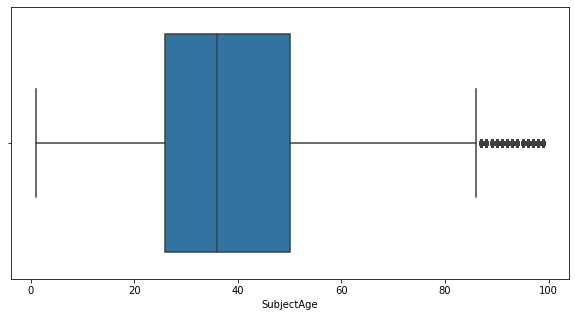

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['SubjectAge'])

In [49]:
df.SubjectAge.mean()

38.642864165005754

In [50]:
df.SubjectAge.median()

36.0

In [51]:
df.shape

(2268333, 18)

#### Replacing SubjectAge > 85 and < 14 by the median age

In [52]:
df.loc[df.SubjectAge > 85, 'SubjectAge'] = df.SubjectAge.median()
df.loc[df.SubjectAge < 14, 'SubjectAge'] = df.SubjectAge.median()

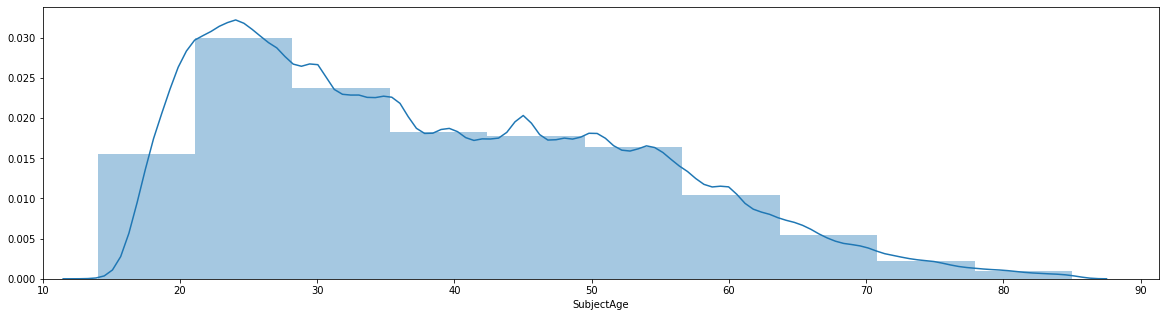

In [53]:
plt.figure(figsize=(20,5))
sns.distplot(df['SubjectAge'], bins =10)
plt.xlim(10);

#### Undersampling dataset to increase the balance of the dataset from 1% to 2% of true class

In [54]:
df.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator,HourDay,DayWeek,Month
0,False,False,new haven,2013-10-01,new haven,V,262,True,N,stop sign,31.0,H,W,M,True,0.0,1,10
1,False,False,state police,2013-10-01,willington,V,1000002715,False,N,other,29.0,M,W,M,False,0.0,1,10
2,False,False,plymouth,2013-10-01,terryville,V,21,True,N,speed related,18.0,N,W,M,True,0.0,1,10
3,False,False,plymouth,2013-10-01,plymouth,V,D1,True,N,speed related,52.0,N,W,F,False,0.0,1,10
4,False,False,bethel,2013-10-01,bethel,V,08M,True,N,cell phone,34.0,N,W,M,False,0.0,1,10


In [55]:
class_0, class_1 = df.ContrabandIndicator.value_counts()


df_class_0 = df[df['ContrabandIndicator'] == 0]
df_class_1 = df[df['ContrabandIndicator'] == 1]


df_class_0_under = df_class_0.sample(df_class_1.shape[0]*49,random_state=1)
df_new = pd.concat([df_class_0_under, df_class_1], axis=0)
df_new = df_new.reset_index(drop=True)


Dropping SubjectSexCode, SubjectEthnicityCode, SubjectRaceCode, SubjectAge to avoid bias towards individuals race, gender, ethnicity and age and 
dropping ReportingOfficerIdentificationID as it shouldn't depend on the officer name




In [56]:
X = df_new[['Department Name','InterventionReasonCode', 'ResidentIndicator', 'SearchAuthorizationCode',
            'StatuteReason', 'TownResidentIndicator', 'HourDay', 'DayWeek', 'Month']]


In [57]:
y = df_new['ContrabandIndicator']

In [58]:
df_new.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator,HourDay,DayWeek,Month
0,False,False,new canaan,2014-09-01 16:06:00,new canaan,E,255,True,N,display of plates,54.0,N,W,M,True,16.100000,0,9
1,False,False,newington,2014-07-24 18:11:00,newington,V,EAS2608,True,N,speed related,41.0,N,W,M,False,18.183333,3,7
2,True,False,west hartford,2016-01-04 10:54:40,west hartford,V,1000002101,True,C,moving violation,60.0,N,B,M,False,10.900000,0,1
3,False,False,old saybrook,2016-12-03 17:00:00,old saybrook,E,30,True,N,defective lights,46.0,N,W,M,True,17.000000,5,12
4,False,False,orange,2014-02-12 19:59:00,orange,V,MSC9492,True,N,traffic control signal,20.0,N,W,M,False,19.983333,2,2


In [59]:
y

0          False
1          False
2          False
3          False
4          False
           ...  
1282195     True
1282196     True
1282197     True
1282198     True
1282199     True
Name: ContrabandIndicator, Length: 1282200, dtype: bool

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
X_train.head()

,Department Name,InterventionReasonCode,ResidentIndicator,SearchAuthorizationCode,StatuteReason,TownResidentIndicator,HourDay,DayWeek,Month
984784,csp troop h,V,False,N,moving violation,False,17.050000,0,2
238490,state police,V,False,N,speed related,False,22.500000,6,11
660313,new canaan,V,True,N,speed related,False,9.833333,6,2
872193,mta stamford,V,True,O,cell phone,True,11.166667,1,11
158802,csp troop a,V,True,N,stc violation,False,15.650000,4,10


In [62]:
be = BinaryEncoder(verbose=1)
be.fit(X_train)
X_train_encoded = be.transform(X_train)
X_test_encoded = be.transform(X_test)


In [63]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_encoded)
X_train_mm = mm_scaler.transform(X_train_encoded)
X_test_mm = mm_scaler.transform(X_test_encoded)

X_train_ = pd.DataFrame(X_train_mm, columns = X_train_encoded.columns)
X_test_ = pd.DataFrame(X_test_mm, columns = X_test_encoded.columns)

## Logistic Regression

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(X_train_, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = lr.predict(X_test_)

print('Precision score:', precision_score(y_test,y_pred))
print('Recall score:', recall_score(y_test,y_pred))
print('Accuracy score:', accuracy_score(y_test,y_pred))


Precision score: 0.6302972802024035
Recall score: 0.3854932301740812
Accuracy score: 0.9830525659023553


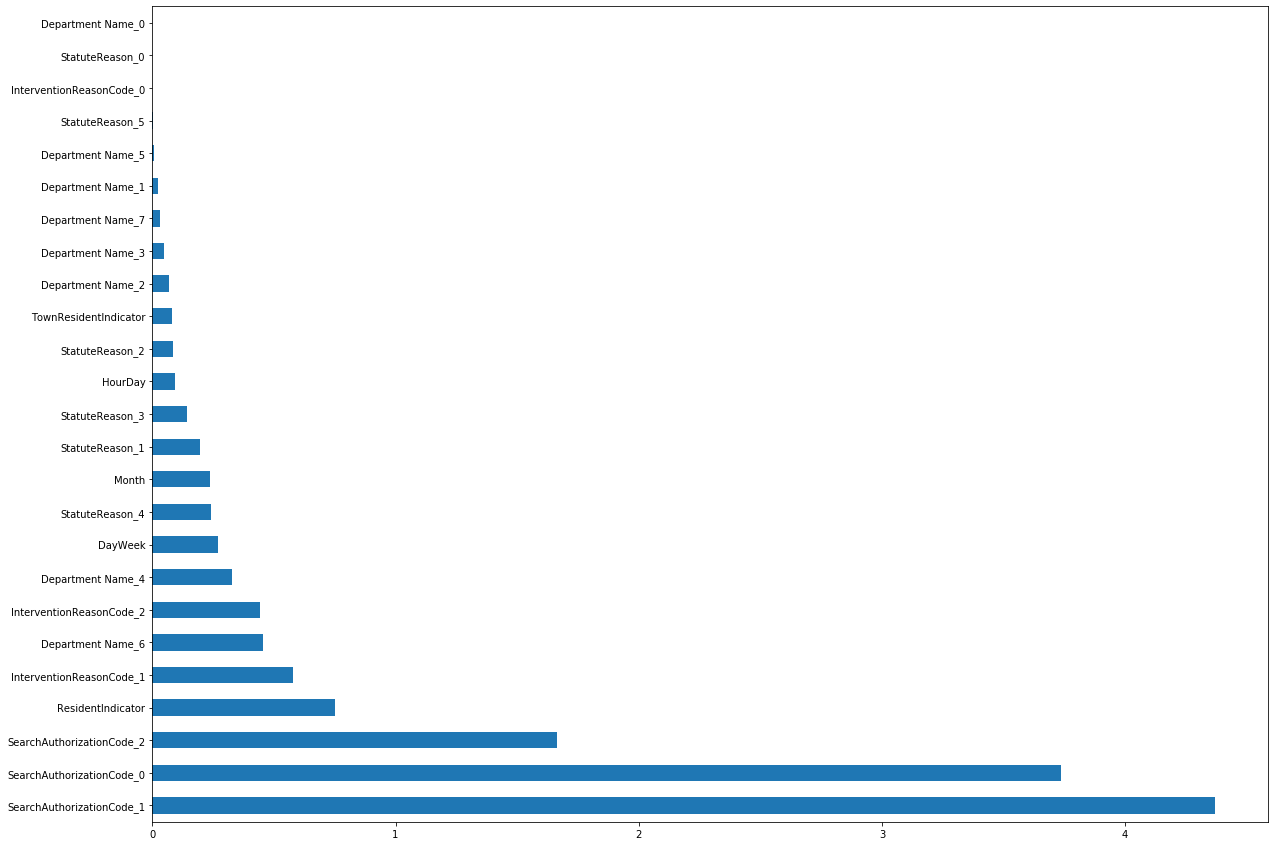

In [67]:
plt.figure(figsize=(20,15))

pd.Series(abs(lr.coef_[0, :]), index=X_train_.columns).nlargest(100).plot.barh();

## Random Forest Classifier

In [68]:
rf = RandomForestClassifier()

In [69]:
rf.fit(X_train_, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_pred = rf.predict(X_test_)


print('Precision score:', precision_score(y_test,y_pred))
print('Recall score:', recall_score(y_test,y_pred))
print('Accuracy score:', accuracy_score(y_test,y_pred))


Precision score: 0.6672601825061206
Recall score: 0.5798839458413927
Accuracy score: 0.985700358758384


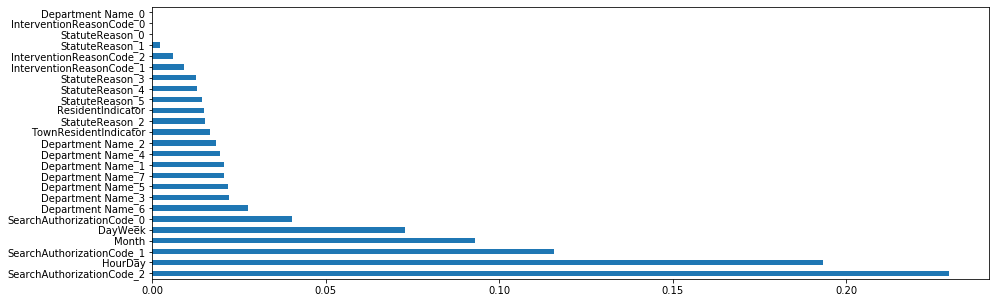

In [71]:
plt.figure(figsize=(15,5))
pd.Series(rf.feature_importances_, index=X_train_.columns).nlargest(X_train_.shape[0]).plot.barh();

In [72]:
random_search_parameter_space_dist = {
                   "max_depth": [10, 20, None],
                   "n_estimators": [10, 20, 50, 100, 200]}

In [73]:
randomized_search = RandomizedSearchCV(
                        rf, 
                        random_search_parameter_space_dist,
                        cv=3, n_iter=5,
                        random_state=1,
                        return_train_score=True,
                        scoring = 'precision'
                        )

In [74]:
%%time

randomized_search.fit(X_train_, y_train)

CPU times: user 27min 10s, sys: 20.9 s, total: 27min 31s
Wall time: 28min 10s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [75]:
randomized_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
pred = randomized_search.predict_proba(X_test_)

In [77]:
y_pred = (pred[:,1] >= 0.55)

print('Precision score:', round(precision_score(y_test,y_pred),2))
print('Accuracy score:', round(accuracy_score(y_test,y_pred),2))
print('Recall score:', round(recall_score(y_test,y_pred),2))

Precision score: 0.71
Accuracy score: 0.98
Recall score: 0.41


### Assessing fairness of model for protected classes by assessing precision for each one

In [78]:
df_fairness = df_new[['SubjectEthnicityCode', 'SubjectRaceCode', 'SubjectSexCode']]

In [79]:
df_new.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator,HourDay,DayWeek,Month
0,False,False,new canaan,2014-09-01 16:06:00,new canaan,E,255,True,N,display of plates,54.0,N,W,M,True,16.100000,0,9
1,False,False,newington,2014-07-24 18:11:00,newington,V,EAS2608,True,N,speed related,41.0,N,W,M,False,18.183333,3,7
2,True,False,west hartford,2016-01-04 10:54:40,west hartford,V,1000002101,True,C,moving violation,60.0,N,B,M,False,10.900000,0,1
3,False,False,old saybrook,2016-12-03 17:00:00,old saybrook,E,30,True,N,defective lights,46.0,N,W,M,True,17.000000,5,12
4,False,False,orange,2014-02-12 19:59:00,orange,V,MSC9492,True,N,traffic control signal,20.0,N,W,M,False,19.983333,2,2


In [80]:
train_fair, test_fair, y_train_fair, y_test_fair = train_test_split(df_fairness, y, test_size=0.2, random_state=1)

In [81]:
test_fair['y'] = y_test_fair
test_fair['y_pred'] = y_pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
def plot_precision(df , protected_class):
    
    TP = df[(df.y_pred == 1) & (df.y == 1)]
    FP = df[(df.y_pred == 1) & (df.y == 0)]

    prec = TP.groupby(TP[protected_class])[protected_class].count()/(FP.groupby(FP[protected_class])[protected_class].count() + TP.groupby(TP[protected_class])[protected_class].count())
    plt.figure(figsize=(15, 5))
    pal = sns.color_palette("Reds_d", len(prec))

    sns.barplot(prec.index, prec.values)


    ax = sns.barplot(prec.index, prec.values, palette=np.array(pal[::-1]))

    ax.set(xlabel=protected_class, ylabel='Precision')
    plt.show()
    print(prec)

In [83]:
test_fair.head()

,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,y,y_pred
174839,H,W,M,False,False
437892,M,B,F,False,False
1203822,H,W,M,False,False
981233,N,W,F,False,False
1185900,N,W,M,False,False


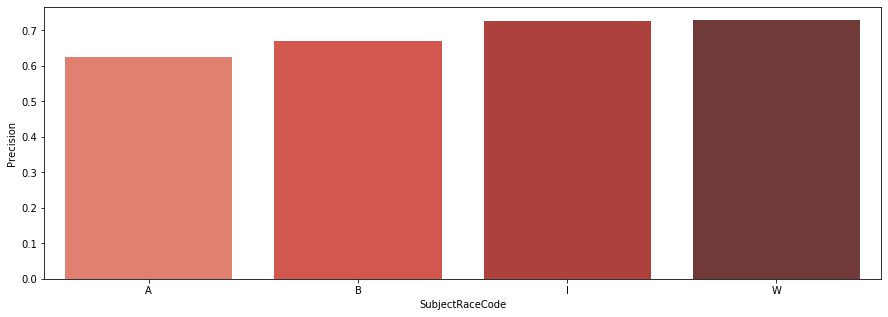

SubjectRaceCode
A    0.625000
B    0.669056
I    0.727273
W    0.729356
Name: SubjectRaceCode, dtype: float64


In [84]:
plot_precision(test_fair, 'SubjectRaceCode')

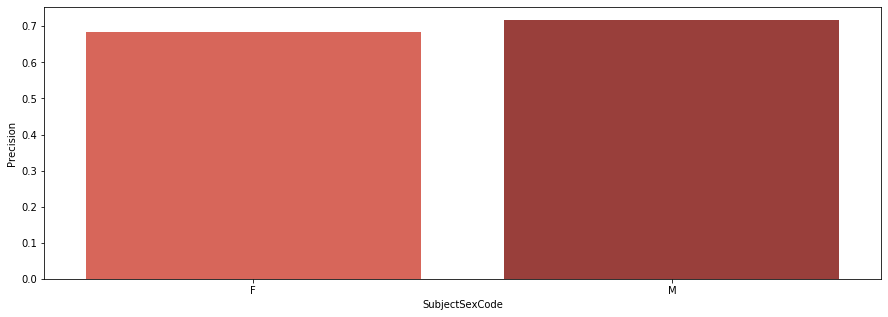

SubjectSexCode
F    0.685152
M    0.717608
Name: SubjectSexCode, dtype: float64


In [85]:
plot_precision(test_fair, 'SubjectSexCode')

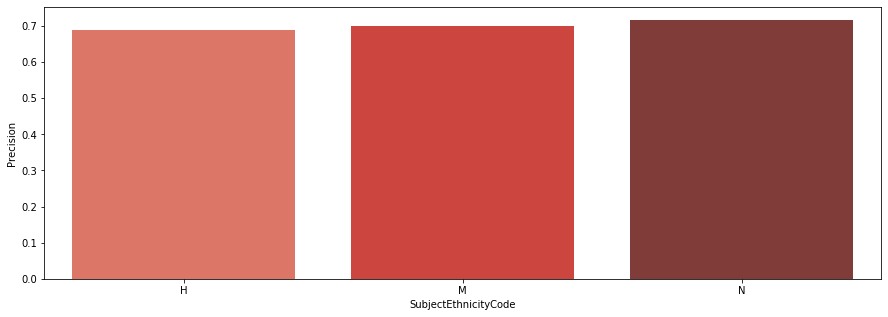

SubjectEthnicityCode
H    0.689013
M    0.700000
N    0.716667
Name: SubjectEthnicityCode, dtype: float64


In [86]:
plot_precision(test_fair, 'SubjectEthnicityCode')